In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock,euclidean
from utils import refactor_and_plot

In [2]:
data = np.array(np.random.rand(100,2)*10 )

In [3]:
data = np.array([[0,0],[0.5,0.5],[0.5,1],[1,0.5], [0,1], [4.5,4.5],[5,4.5],[4.5,5], [5,5]])

In [4]:
data = np.array([
    [2,6],
    [3,4],
    [3,8],
    [4,7],
    [6,2],
    [6,4],
    [7,3],
    [7,4],
    [8,5],
    [7,6]
])

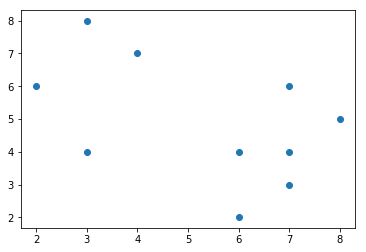

In [5]:


plot_x = [d[0] for d in data]
plot_y = [d[1] for d in data]
plt.scatter(plot_x,plot_y)
plt.show()

In [8]:
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(data,metric="manhattan")

In [93]:
def compute_cost(medoid_indices,D,k,min_cost):
    clusters = []
    cost = 0
    for i in range(len(D)):
        distances = np.array([D[i,medoid_indices[j]] for j in range(k) ])
            
        closest_medoid_idx = distances.argmin()
        
        clusters.append(closest_medoid_idx)
        cost += distances[closest_medoid_idx]
        
        if cost > min_cost:
            return (False,cost,clusters,cost)
    return (True,cost,clusters,cost)

In [94]:
import copy
def pam(D, k):
    # initialization step
    former_cost = float("inf")
    min_cost = float("inf")
    clusters = []
    
    if k > len(data):
        print(" number of medoids is greater than data length")
    else:
        medoid_indices = np.random.choice(len(D),k, replace = False)
    _,new_cost,clusters,min_cost = compute_cost(medoid_indices,D,k,min_cost)
    print("cost: " + str(new_cost))
    
    while new_cost < former_cost:
        
        display_pam_results_2D(data,clusters, data[medoid_indices],True)
        
        former_cost = new_cost
        for j in range(k):
            for i in range(len(D)):
                
                if i not in medoid_indices:
                    
                    med_idx = copy.copy(medoid_indices)
                    med_idx[j] = i
                    
                    res = compute_cost(med_idx,D,k,min_cost)
                    
                    if res[0] == True:
                        
                        mod_cost,clusters,min_cost = res[1], res[2], res[3]
                        
                        if mod_cost < new_cost:
                            
                            medoid_indices = copy.copy(med_idx)
                            new_cost = mod_cost
        
        print("cost: " + str(new_cost))
        
    return medoid_indices.tolist(), clusters

cost: 34.0
cost: 18.0
cost: 18.0


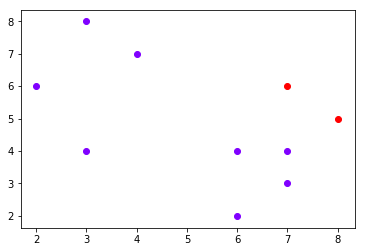

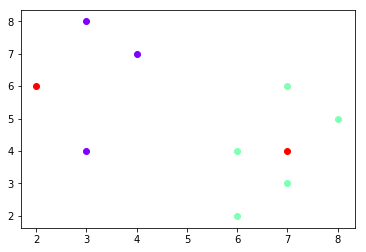

In [95]:
medoid_indices, clusters = pam(distance_matrix, k = nb_clusters)

In [11]:
nb_clusters = 2

In [22]:
def associate_to_cluster(medoid_indices,data,k,min_cost):
    clusters = [[] for _ in range(len(data))]
    costs = [0 for _ in range(k)]
    cost = 0
    for i,d in enumerate(data):
        distances = np.array([cityblock(d,data[m]) for m in medoid_indices ])
        closest_medoid_idx = distances.argmin()
        clusters[i] = closest_medoid_idx
        #costs[closest_medoid_idx] += distances[closest_medoid_idx]
        cost += distances[closest_medoid_idx]
        if cost > min_cost:
            return (False,cost,clusters,cost)
    #cost = np.sum(costs)
    #print("initialization cost: " + str(cost))
    
    return (True,cost,clusters,cost)
    

In [23]:
import copy
def partitioning_around_medoids(data, k):
    # initialization step
    former_cost = float("inf")
    min_cost = float("inf")
    clusters = []
    
    if k > len(data):
        print(" number of medoids is greater than data length")
    else:
        medoid_indices = np.random.choice(len(data),k, replace = False)
    
    _,new_cost,clusters,min_cost = associate_to_cluster(medoid_indices,data,k,min_cost)
    print("cost: " + str(new_cost))
    #print("min_cost: " + str(min_cost))
    #clustering step
    while new_cost < former_cost:
        display_pam_results_2D(data,clusters, data[medoid_indices],True)
        
        former_cost = new_cost
        for j,m in enumerate(medoid_indices):
            for i,o in enumerate(data):
                if i not in medoid_indices:
                    med_idx = copy.copy(medoid_indices)
                    med_idx[j] = i
                    res = associate_to_cluster(med_idx,data,k,min_cost)
                    #print(res)
                    if res[0] == True:
                        mod_cost,clusters,min_cost = res[1], res[2], res[3]
                        #print("min_cost1: " + str(min_cost))
                        if mod_cost <= new_cost:
                            medoid_indices = copy.copy(med_idx)
                            new_cost = mod_cost
        
        print("cost: " + str(new_cost))
        
    return medoid_indices.tolist(), clusters

cost: 19
cost: 18
cost: 18


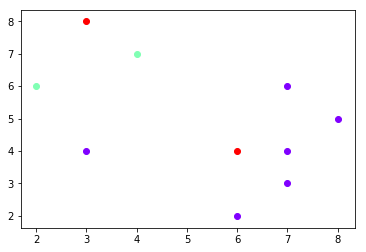

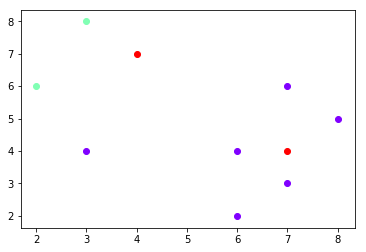

In [24]:
medoid_indices, clusters = partitioning_around_medoids(data, k = nb_clusters)

In [8]:
def associate_to_cluster1(medoid_indices,data,k):
    clusters = [[] for _ in range(len(data))]
    costs = [0 for _ in range(k)]
    for i,d in enumerate(data):
        distances = np.array([cityblock(d,data[m]) for m in medoid_indices ])
        closest_medoid_idx = distances.argmin()
        clusters[i] = closest_medoid_idx
        costs[closest_medoid_idx] += distances[closest_medoid_idx]
    cost = np.sum(costs)
    #print("initialization cost: " + str(cost))
    
    return cost,clusters

In [22]:
def nearest_point(data,x):
    min_ = float("inf")
    idx = -1
    for i,d in enumerate(data):
        if euclidean(d,x) < min_:
            min_ = euclidean(d,x)
            idx = i
    return idx

In [47]:
def kmedoid(data, k,nb_feature = 50):
    
    # initialization step
    former_cost = float("inf")
    clusters = []
    
    if k > len(data):
        print(" number of medoids is greater than data length")
    else:
        medoid_indices = np.random.choice(len(data),k, replace = False)
    
    new_cost,clusters = associate_to_cluster1(medoid_indices,data,k)
    
    #clustering step
    #while new_cost < former_cost:
        #former_cost = new_cost
    
    while new_cost < former_cost:
        print("cost: " + str(new_cost))
        former_cost = new_cost
        for i in range(k):
            mean = np.zeros(nb_feature)
            nb = 0


            for j in range(len(data)):
                if clusters[j] == i:
                    #print("in")
                    #print(mean)
                    #print(data[j])
                    mean += data[j]
                    nb += 1
            mean /= float(nb)
            #print(mean)
            medoid_indices[i] = nearest_point(data,mean)
        new_cost,clusters = associate_to_cluster1(medoid_indices,data,k)

    return medoid_indices.tolist(), clusters
    
medoid_indices, clusters = kmedoid(data, nb_clusters,nb_feature = 2)

cost: 24
cost: 18


In [48]:
medoids = data[medoid_indices]

In [49]:
print(medoids)

[[7 4]
 [2 6]]


In [13]:
import matplotlib.cm as cm

def point_is_medoid(medoids, point):
    for e in medoids:
        if euclidean(e,point) == 0:
            return True
    return False


def display_pam_results_2D(data,clusters, medoids, display_medoids = True):
    plt.figure()
    colors = cm.rainbow(np.linspace(0, 1, nb_clusters+1))

    for i,row in enumerate(data):
        c = colors[clusters[i]]
        if display_medoids and point_is_medoid(medoids, row):
            c = colors[-1]
        plt.scatter(row[0], row[1], color = c)   

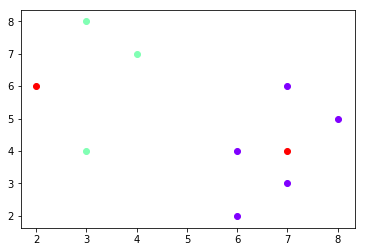

In [51]:
display_pam_results_2D(data,clusters, medoids,True)